<a href="https://colab.research.google.com/github/Anuj347/Heat-Pump-Control-ML/blob/main/Heat_pump_model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heat Pump Model

This notebook is an approach to find the coefficients of the models used by the EnergyPlus program for estimating the electric power input of an electric liquid chiller for a given boundary conditions. In this approach same models are used for heat pumps for a given boundary conditions Tsup (supplied heat temperature) and Tout(outdoor temperature).

### Importing numpy and pandas library

NumPy library is used for efficient numerical computations and working with arrays,matrices, and mathematical functions

Pandas library is designed for data manipulation, providing data structures and functions to efficiently handle and process data like tables.

In [ ]:
import numpy as np
import pandas as pd

### Importing the dataset provided

Here the laboratory data is imported using Pandas. This dataset helps in understanding the variation of electric power(P_ele) with the changes in boundary condition(Tsup and Tout) and also the heating demands Q.

Further this data will be used to find the coefficient of the heat pump models.

In [ ]:
data = pd.read_excel('Updated_Data.xlsx')

In [ ]:
data

,Tout,Tsup,Qth,Pel
0,-15,50,24.65,12.47
1,-7,50,29.77,12.78
2,2,50,36.69,13.15
3,7,50,41.24,13.35
4,14,50,49.57,13.74
5,25,50,63.33,14.11
6,35,50,63.33,13.91
7,45,50,63.33,13.81
8,-15,55,25.45,13.78
9,-7,55,30.50,14.14


In [ ]:
data.rename(columns={'Qth':'Q'}, inplace = True)
data.rename(columns={'Pel':'P_ele'}, inplace = True)

In [ ]:
data

,Tout,Tsup,Q,P_ele
0,-15,50,24.65,12.47
1,-7,50,29.77,12.78
2,2,50,36.69,13.15
3,7,50,41.24,13.35
4,14,50,49.57,13.74
5,25,50,63.33,14.11
6,35,50,63.33,13.91
7,45,50,63.33,13.81
8,-15,55,25.45,13.78
9,-7,55,30.50,14.14


### Nomenclature

Tout = Outdoor Temperature

Tsup = Temperature at which heatpump is supplying the heat

Q = Heat supplied by the heat pump

P_ele = Electric power consumption of the heat pump

### Dropping the null values in the dataset

Null values in the dataset needs to be identified and dropped in the datacleaning process as it may affect the coefficient identification process.

In [ ]:
data.dropna(inplace=True)
data

,Tout,Tsup,Q,P_ele
0,-15,50,24.65,12.47
1,-7,50,29.77,12.78
2,2,50,36.69,13.15
3,7,50,41.24,13.35
4,14,50,49.57,13.74
5,25,50,63.33,14.11
6,35,50,63.33,13.91
7,45,50,63.33,13.81
8,-15,55,25.45,13.78
9,-7,55,30.50,14.14


In [ ]:
data[data['P_ele']==0]

,Tout,Tsup,Q,P_ele
24,-15,65,0.0,0.0


In [ ]:
i = data[data['P_ele']==0].index
data = data.drop(i)
data

,Tout,Tsup,Q,P_ele
0,-15,50,24.65,12.47
1,-7,50,29.77,12.78
2,2,50,36.69,13.15
3,7,50,41.24,13.35
4,14,50,49.57,13.74
5,25,50,63.33,14.11
6,35,50,63.33,13.91
7,45,50,63.33,13.81
8,-15,55,25.45,13.78
9,-7,55,30.50,14.14


## Step-1
In the data set, the maximum heat load of heatpump Qe_max is identified. The maximum Qe_max and the corresponding electric power P_ele, and COP are then used as the reference values (Qref = QEmax, Pref = P_ele, and COP = COPref)

In [ ]:
Qe_max = data['Q'].max()

In [ ]:
Qe_max

63.33

In [ ]:
Qref = Qe_max

In [ ]:
Qref

63.33

In [ ]:
filtered_data = data[data['Q'] == Qe_max]

In [ ]:
Pref = filtered_data['P_ele'].values[0]

In [ ]:
Pref

14.11

#### Calculating the COP_real column by dividing Q by P_ele

In [ ]:
data['COP_real']= data['Q']/data['P_ele']

In [ ]:
data

,Tout,Tsup,Q,P_ele,COP_real
0,-15,50,24.65,12.47,1.976744
1,-7,50,29.77,12.78,2.329421
2,2,50,36.69,13.15,2.790114
3,7,50,41.24,13.35,3.089139
4,14,50,49.57,13.74,3.607715
5,25,50,63.33,14.11,4.488306
6,35,50,63.33,13.91,4.552840
7,45,50,63.33,13.81,4.585807
8,-15,55,25.45,13.78,1.846880
9,-7,55,30.50,14.14,2.157001


In [ ]:
COPref = Qe_max/Pref

In [ ]:
COPref

4.4883061658398296

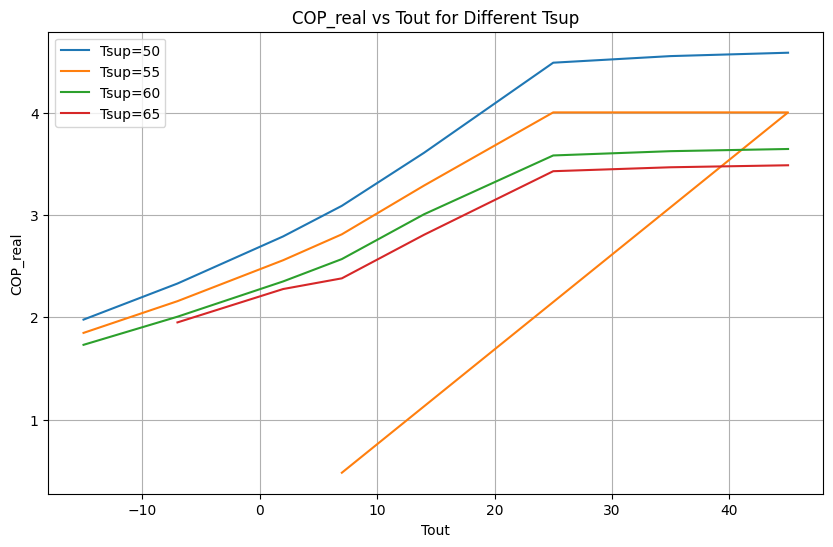

In [ ]:
import matplotlib.pyplot as plt

# Filter the data where COP_predicted and Tout are not NaN
filtered_df = data.dropna(subset=['COP_real', 'Tout'])

# Group the filtered data by Tsup
grouped = filtered_df.groupby('Tsup')

# Plot COP_predicted vs Tout for each Tsup value
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for tsup, group in grouped:
    plt.plot(group['Tout'], group['COP_real'], label=f'Tsup={tsup}')

plt.xlabel('Tout')
plt.ylabel('COP_real')
plt.title('COP_real vs Tout for Different Tsup')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data.drop(data.index[-1],inplace=True)
data

,Tout,Tsup,Q,P_ele,COP_real
0,-15,50,24.65,12.47,1.976744
1,-7,50,29.77,12.78,2.329421
2,2,50,36.69,13.15,2.790114
3,7,50,41.24,13.35,3.089139
4,14,50,49.57,13.74,3.607715
5,25,50,63.33,14.11,4.488306
6,35,50,63.33,13.91,4.552840
7,45,50,63.33,13.81,4.585807
8,-15,55,25.45,13.78,1.846880
9,-7,55,30.50,14.14,2.157001


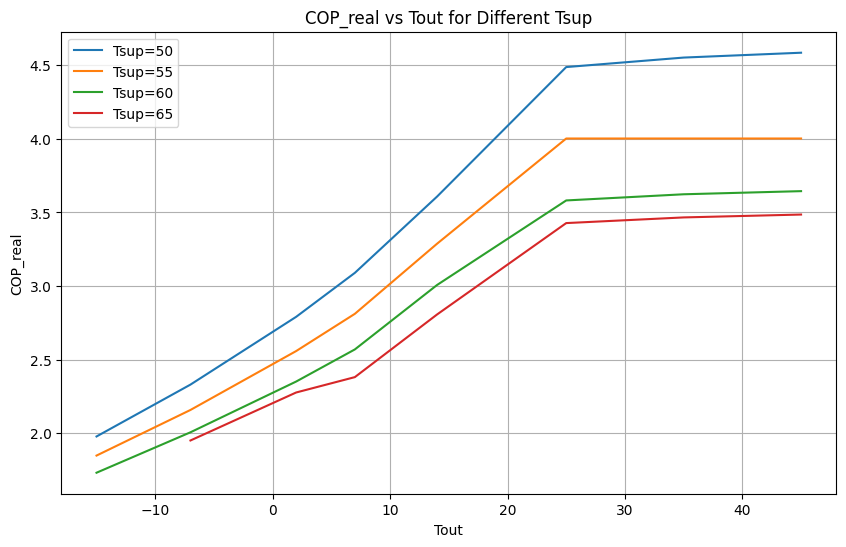

In [ ]:
# Filter the data where COP_predicted and Tout are not NaN
filtered_df = data.dropna(subset=['COP_real', 'Tout'])

# Group the filtered data by Tsup
grouped = filtered_df.groupby('Tsup')

# Plot COP_predicted vs Tout for each Tsup value
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for tsup, group in grouped:
    plt.plot(group['Tout'], group['COP_real'], label=f'Tsup={tsup}')

plt.xlabel('Tout')
plt.ylabel('COP_real')
plt.title('COP_real vs Tout for Different Tsup')
plt.legend()
plt.grid(True)
plt.show()

## Step -2

For all data in the data set, the CAPFT is calculated using equation(1), where Qref = Qe_max and Q is the thermal load at each timestep

CAPFT = Q/Qref  - (1)

In [ ]:
data['CAPFT']= data['Q']/Qref

In [ ]:
data

,Tout,Tsup,Q,P_ele,COP_real,CAPFT
0,-15,50,24.65,12.47,1.976744,0.389231
1,-7,50,29.77,12.78,2.329421,0.470077
2,2,50,36.69,13.15,2.790114,0.579346
3,7,50,41.24,13.35,3.089139,0.651192
4,14,50,49.57,13.74,3.607715,0.782725
5,25,50,63.33,14.11,4.488306,1.000000
6,35,50,63.33,13.91,4.552840,1.000000
7,45,50,63.33,13.81,4.585807,1.000000
8,-15,55,25.45,13.78,1.846880,0.401863
9,-7,55,30.50,14.14,2.157001,0.481604


## Step -3

The training data set is split into

(1) full-load and

(2) part-load conditions based on the CAPFT values calculated.

For this study, the full-load conditions data set was selected for CAPFT values greater than or equal to 0.85 (CAPFT >= 0.85), while the part-load conditions for CAPFT values were lower than 0.85 (CAPFT < 0.85).

A CAPFT greater than 0.85 is selected for the full-load conditions since the heat pumps operate most of the time around 55-
60% of their full design capacity.

In [ ]:
#Identifying the operating points where CAPFT>=0.85
data['FL'] = data['CAPFT']>=0.85

In [ ]:
data

,Tout,Tsup,Q,P_ele,COP_real,CAPFT,FL
0,-15,50,24.65,12.47,1.976744,0.389231,False
1,-7,50,29.77,12.78,2.329421,0.470077,False
2,2,50,36.69,13.15,2.790114,0.579346,False
3,7,50,41.24,13.35,3.089139,0.651192,False
4,14,50,49.57,13.74,3.607715,0.782725,False
5,25,50,63.33,14.11,4.488306,1.000000,True
6,35,50,63.33,13.91,4.552840,1.000000,True
7,45,50,63.33,13.81,4.585807,1.000000,True
8,-15,55,25.45,13.78,1.846880,0.401863,False
9,-7,55,30.50,14.14,2.157001,0.481604,False


In [ ]:
# Similarly identifying the operating points where CAPFT<0.85
data['PL'] = data['CAPFT']<0.85

In [ ]:
data

,Tout,Tsup,Q,P_ele,COP_real,CAPFT,FL,PL
0,-15,50,24.65,12.47,1.976744,0.389231,False,True
1,-7,50,29.77,12.78,2.329421,0.470077,False,True
2,2,50,36.69,13.15,2.790114,0.579346,False,True
3,7,50,41.24,13.35,3.089139,0.651192,False,True
4,14,50,49.57,13.74,3.607715,0.782725,False,True
5,25,50,63.33,14.11,4.488306,1.000000,True,False
6,35,50,63.33,13.91,4.552840,1.000000,True,False
7,45,50,63.33,13.81,4.585807,1.000000,True,False
8,-15,55,25.45,13.78,1.846880,0.401863,False,True
9,-7,55,30.50,14.14,2.157001,0.481604,False,True


In [ ]:
train_data = data

## Step-4

For the full-load conditions data set (CAPFT >=0.85), the EIRFT is calculated at each time-step using equation(2), where CAPFT is already calculated for the whole dataset using equation(1);

EIRFT = (P_ele)/(Pref * CAPFT)   - (2)

In [ ]:
train_data.loc[data['FL']==True,'EIRFT'] = train_data['P_ele']/Pref/train_data['CAPFT']

In [ ]:
train_data

,Tout,Tsup,Q,P_ele,COP_real,CAPFT,FL,PL,EIRFT
0,-15,50,24.65,12.47,1.976744,0.389231,False,True,NaN
1,-7,50,29.77,12.78,2.329421,0.470077,False,True,NaN
2,2,50,36.69,13.15,2.790114,0.579346,False,True,NaN
3,7,50,41.24,13.35,3.089139,0.651192,False,True,NaN
4,14,50,49.57,13.74,3.607715,0.782725,False,True,NaN
5,25,50,63.33,14.11,4.488306,1.000000,True,False,1.000000
6,35,50,63.33,13.91,4.552840,1.000000,True,False,0.985826
7,45,50,63.33,13.81,4.585807,1.000000,True,False,0.978738
8,-15,55,25.45,13.78,1.846880,0.401863,False,True,NaN
9,-7,55,30.50,14.14,2.157001,0.481604,False,True,NaN


## Step-5

The full-load conditions data set is used to identify the coefficients aj of equation (3) where CapFTemp is equal to CAPFT (Equation (1)),and the coefficients bj of equation (4) where EIRTemp is equal to EIRFT (Equation (2)).

CapFTemp = a0 + (a1* Tsup) + (a2* Tsup^2) + (a3* Tout) + (a4* Tout^2) + (a5* Tsup * Tout)    - (3)

EIRFTemp = b0 + (b1* Tsup) + (b2* Tsup^2) + (b3* Tout) + (b4* Tout^2) + (b5* Tsup * Tout)    - (4)

#### Only Selecting data which have non-null values of EIRFT which means the full load conditions as only this dataset will be used to find the coefficients of the equation

In [ ]:
#Filtering out the data that needs to be used for calculating the coefficients in equation (4) i.e. bi
data_EIRFT = train_data[train_data['EIRFT'].notnull()]

In [ ]:
data_EIRFT

,Tout,Tsup,Q,P_ele,COP_real,CAPFT,FL,PL,EIRFT
5,25,50,63.33,14.11,4.488306,1.000000,True,False,1.000000
6,35,50,63.33,13.91,4.552840,1.000000,True,False,0.985826
7,45,50,63.33,13.81,4.585807,1.000000,True,False,0.978738
13,25,55,62.60,15.64,4.002558,0.988473,True,False,1.121360
14,35,55,62.60,15.64,4.002558,0.988473,True,False,1.121360
15,45,55,62.60,15.64,4.002558,0.988473,True,False,1.121360
21,25,60,61.96,17.30,3.581503,0.978367,True,False,1.253191
22,35,60,61.96,17.10,3.623392,0.978367,True,False,1.238703
23,45,60,61.96,17.00,3.644706,0.978367,True,False,1.231459
29,25,65,61.73,18.01,3.427540,0.974736,True,False,1.309483


#### Converting dataframe into an array as it is used in solving equation

In [ ]:
Tsup_EIRFT = data_EIRFT['Tsup'].values

In [ ]:
Tsup_EIRFT

array([50, 50, 50, 55, 55, 55, 60, 60, 60, 65, 65, 65])

In [ ]:
Tout_EIRFT = data_EIRFT['Tout'].values

In [ ]:
Tout_EIRFT

array([25, 35, 45, 25, 35, 45, 25, 35, 45, 25, 35, 45])

In [ ]:
EIRFT = data_EIRFT['EIRFT'].values

In [ ]:
EIRFT

array([1.        , 0.98582566, 0.97873848, 1.12135956, 1.12135956,
       1.12135956, 1.25319071, 1.23870296, 1.23145908, 1.30948314,
       1.2949414 , 1.28767054])

### Determing the coefficents bi
Fitting the data in equation (4) to find the coefficients of the equation (b0, b1, b2, b3, b4, b5)

In [ ]:
x=Tsup_EIRFT
y= Tout_EIRFT
z=EIRFT

# Create the design matrix
#design_matrix = np.vstack([np.ones_like(x), x, x**2, y, y**2, x*y]).T
X = np.column_stack((np.ones(len(x)), x, np.square(x), y, np.square(y), np.multiply(x, y)))
# Find the coefficients using least squares fitting

#coefficients_EIRFT = np.linalg.lstsq(design_matrix, z, rcond=None)[0]
coefficients, _, _, _ = np.linalg.lstsq(X, z, rcond=None)
# Store coefficients in separate variables
b0, b1, b2, b3, b4, b5 = coefficients

In [ ]:
coefficients

array([-2.54906997e+00,  1.10226935e-01, -7.69240741e-04, -1.35560872e-03,
        2.70023952e-05, -2.33848834e-05])

In [ ]:
data_CAPFT = data_EIRFT

In [ ]:
#Filtering out the data that needs to be used for calculating the coefficients in equation (3) i.e. ai
CAPFT = data_EIRFT['CAPFT'].values

### Determing the coefficents ai
Fitting the data in equation (3) to find the coefficients of the equation (a0, a1, a2, a3, a4, a5)

In [ ]:
x=Tsup_EIRFT
y= Tout_EIRFT
z= CAPFT

# Create the design matrix
#design_matrix = np.vstack([np.ones_like(x), x, x**2, y, y**2, x*y]).T
X = np.column_stack((np.ones(len(x)), x, np.square(x), y, np.square(y), np.multiply(x, y)))
# Find the coefficients using least squares fitting

#coefficients_EIRFT = np.linalg.lstsq(design_matrix, z, rcond=None)[0]
coefficients, _, _, _ = np.linalg.lstsq(X, z, rcond=None)
# Store coefficients in separate variables
a0, a1, a2, a3, a4, a5 = coefficients

In [ ]:
coefficients

array([ 1.34274435e+00, -1.07974104e-02,  7.89515238e-05, -3.00798340e-16,
        6.07153217e-18, -2.60208521e-18])

In [ ]:
a0

1.3427443549660827

In [ ]:
b0

-2.549069970446458

## Step-6

Using the coefficients aj and bj identified in (Step-5),the estimates of CapFTemp* (Equation(3)) and EIRTemp* (Equation (4)) are calculated for all the data in the training data set, i.e. for the full and part-load conditions;

In [ ]:
train_data['CapFTemp*'] = a0 + a1*train_data['Tsup'] + a2*(train_data['Tsup'])**2 + a3*train_data['Tout'] + a4*(train_data['Tout'])**2 + a5*train_data['Tsup']*train_data['Tout']

In [ ]:
train_data

,Tout,Tsup,Q,P_ele,COP_real,CAPFT,FL,PL,EIRFT,CapFTemp*
0,-15,50,24.65,12.47,1.976744,0.389231,False,True,NaN,1.000253
1,-7,50,29.77,12.78,2.329421,0.470077,False,True,NaN,1.000253
2,2,50,36.69,13.15,2.790114,0.579346,False,True,NaN,1.000253
3,7,50,41.24,13.35,3.089139,0.651192,False,True,NaN,1.000253
4,14,50,49.57,13.74,3.607715,0.782725,False,True,NaN,1.000253
5,25,50,63.33,14.11,4.488306,1.000000,True,False,1.000000,1.000253
6,35,50,63.33,13.91,4.552840,1.000000,True,False,0.985826,1.000253
7,45,50,63.33,13.81,4.585807,1.000000,True,False,0.978738,1.000253
8,-15,55,25.45,13.78,1.846880,0.401863,False,True,NaN,0.987715
9,-7,55,30.50,14.14,2.157001,0.481604,False,True,NaN,0.987715


In [ ]:
train_data['EIRTemp*'] = b0 + b1*train_data['Tsup'] + b2*(train_data['Tsup'])**2 + b3*train_data['Tout'] + b4*(train_data['Tout'])**2 + b5*train_data['Tsup']*train_data['Tout']

In [ ]:
train_data

,Tout,Tsup,Q,P_ele,COP_real,CAPFT,FL,PL,EIRFT,CapFTemp*,EIRTemp*
0,-15,50,24.65,12.47,1.976744,0.389231,False,True,NaN,1.000253,1.083123
1,-7,50,29.77,12.78,2.329421,0.470077,False,True,NaN,1.000253,1.058172
2,2,50,36.69,13.15,2.790114,0.579346,False,True,NaN,1.000253,1.034233
3,7,50,41.24,13.35,3.089139,0.651192,False,True,NaN,1.000253,1.022824
4,14,50,49.57,13.74,3.607715,0.782725,False,True,NaN,1.000253,1.009119
5,25,50,63.33,14.11,4.488306,1.000000,True,False,1.000000,1.000253,0.992930
6,35,50,63.33,13.91,4.552840,1.000000,True,False,0.985826,1.000253,0.983883
7,45,50,63.33,13.81,4.585807,1.000000,True,False,0.978738,1.000253,0.980236
8,-15,55,25.45,13.78,1.846880,0.401863,False,True,NaN,0.987715,1.232160
9,-7,55,30.50,14.14,2.157001,0.481604,False,True,NaN,0.987715,1.206274


## Step-7

The PLR (Equation (5)) and EIRFLPR(Equation (6)) are calculated for all the data in the training data set, i.e. for the full- and partload conditions, where CapFTemp* is the estimate of CapFTemp and EIRFTemp* is the estimate of EIRFTemp;

PLR = Q/Qavail   - (5)

EIRFPLR = P_ele/(Pref* CapFTemp* EIRFTemp*)   - (6)

In [ ]:
train_data['EIRFPLR'] = train_data['P_ele']/Pref/train_data['CapFTemp*']/train_data['EIRTemp*']

In [ ]:
train_data

,Tout,Tsup,Q,P_ele,COP_real,CAPFT,FL,PL,EIRFT,CapFTemp*,EIRTemp*,EIRFPLR
0,-15,50,24.65,12.47,1.976744,0.389231,False,True,NaN,1.000253,1.083123,0.815740
1,-7,50,29.77,12.78,2.329421,0.470077,False,True,NaN,1.000253,1.058172,0.855732
2,2,50,36.69,13.15,2.790114,0.579346,False,True,NaN,1.000253,1.034233,0.900887
3,7,50,41.24,13.35,3.089139,0.651192,False,True,NaN,1.000253,1.022824,0.924791
4,14,50,49.57,13.74,3.607715,0.782725,False,True,NaN,1.000253,1.009119,0.964734
5,25,50,63.33,14.11,4.488306,1.000000,True,False,1.000000,1.000253,0.992930,1.006866
6,35,50,63.33,13.91,4.552840,1.000000,True,False,0.985826,1.000253,0.983883,1.001721
7,45,50,63.33,13.81,4.585807,1.000000,True,False,0.978738,1.000253,0.980236,0.998220
8,-15,55,25.45,13.78,1.846880,0.401863,False,True,NaN,0.987715,1.232160,0.802460
9,-7,55,30.50,14.14,2.157001,0.481604,False,True,NaN,0.987715,1.206274,0.841094


##### Qavail = Qref* CapFTemp*

In [ ]:
train_data['Qavail'] = Qref*train_data['CapFTemp*']
train_data['PLR'] = train_data['Q']/train_data['Qavail']

In [ ]:
train_data

,Tout,Tsup,Q,P_ele,COP_real,CAPFT,FL,PL,EIRFT,CapFTemp*,EIRTemp*,EIRFPLR,Qavail,PLR
0,-15,50,24.65,12.47,1.976744,0.389231,False,True,NaN,1.000253,1.083123,0.815740,63.346,0.389133
1,-7,50,29.77,12.78,2.329421,0.470077,False,True,NaN,1.000253,1.058172,0.855732,63.346,0.469959
2,2,50,36.69,13.15,2.790114,0.579346,False,True,NaN,1.000253,1.034233,0.900887,63.346,0.579200
3,7,50,41.24,13.35,3.089139,0.651192,False,True,NaN,1.000253,1.022824,0.924791,63.346,0.651028
4,14,50,49.57,13.74,3.607715,0.782725,False,True,NaN,1.000253,1.009119,0.964734,63.346,0.782528
5,25,50,63.33,14.11,4.488306,1.000000,True,False,1.000000,1.000253,0.992930,1.006866,63.346,0.999747
6,35,50,63.33,13.91,4.552840,1.000000,True,False,0.985826,1.000253,0.983883,1.001721,63.346,0.999747
7,45,50,63.33,13.81,4.585807,1.000000,True,False,0.978738,1.000253,0.980236,0.998220,63.346,0.999747
8,-15,55,25.45,13.78,1.846880,0.401863,False,True,NaN,0.987715,1.232160,0.802460,62.552,0.406861
9,-7,55,30.50,14.14,2.157001,0.481604,False,True,NaN,0.987715,1.206274,0.841094,62.552,0.487594


## Step-8

All the data in the training data set are used to identify the coefficients cj of Equation (7), where EIRFPLR is equal to EIRFLPR (Equation (6));

EIRFPLR = c0 + (c1* PLR) + (c2* PLR^2)  - (7)

In [ ]:
x= train_data['PLR']
y= train_data['EIRFPLR']

# Create the design matrix
X = np.column_stack((np.ones_like(x), x, x**2))


# Perform linear regression
coefficients_EIRFPLR, residuals, rank, singular_values = np.linalg.lstsq(X, y, rcond=None)

# Store coefficients in separate variables
c0, c1, c2 = coefficients_EIRFPLR

In [ ]:
coefficients_EIRFPLR

array([ 0.58102622,  0.6782889 , -0.25950015])

## Step-9

Using the coefficients ci identified in (Step - 8), EIRFPLR* (Equation (7)) is estimated for all the data in the training data set, i.e. for the full- and part-load conditions;

In [ ]:
train_data['EIRFPLR*'] = c0 + c1*train_data['PLR'] + c2*(train_data['PLR'])**2

In [ ]:
train_data

,Tout,Tsup,Q,P_ele,COP_real,CAPFT,FL,PL,EIRFT,CapFTemp*,EIRTemp*,EIRFPLR,Qavail,PLR,EIRFPLR*
0,-15,50,24.65,12.47,1.976744,0.389231,False,True,NaN,1.000253,1.083123,0.815740,63.346,0.389133,0.805676
1,-7,50,29.77,12.78,2.329421,0.470077,False,True,NaN,1.000253,1.058172,0.855732,63.346,0.469959,0.842480
2,2,50,36.69,13.15,2.790114,0.579346,False,True,NaN,1.000253,1.034233,0.900887,63.346,0.579200,0.886836
3,7,50,41.24,13.35,3.089139,0.651192,False,True,NaN,1.000253,1.022824,0.924791,63.346,0.651028,0.912625
4,14,50,49.57,13.74,3.607715,0.782725,False,True,NaN,1.000253,1.009119,0.964734,63.346,0.782528,0.952901
5,25,50,63.33,14.11,4.488306,1.000000,True,False,1.000000,1.000253,0.992930,1.006866,63.346,0.999747,0.999775
6,35,50,63.33,13.91,4.552840,1.000000,True,False,0.985826,1.000253,0.983883,1.001721,63.346,0.999747,0.999775
7,45,50,63.33,13.81,4.585807,1.000000,True,False,0.978738,1.000253,0.980236,0.998220,63.346,0.999747,0.999775
8,-15,55,25.45,13.78,1.846880,0.401863,False,True,NaN,0.987715,1.232160,0.802460,62.552,0.406861,0.814039
9,-7,55,30.50,14.14,2.157001,0.481604,False,True,NaN,0.987715,1.206274,0.841094,62.552,0.487594,0.850060


## Step-10

The electric power input to the chiller (Equation(8)) is calculated for all data points with the variables calculated in (6), CapFTemp* and EIRTemp*, and in (Step - 9), EIRFPLR*.

PE = (Qavail) * (1/COPref) * (EIRFTemp) * (EIRFPLR)  - (8)

Using equation for Qavail

Qavail = Qref* CapFTemp*

In [ ]:
train_data['P_el_predicted']= Qref*train_data['CapFTemp*']/COPref*train_data['EIRTemp*']*train_data['EIRFPLR*']

In [ ]:
train_data

,Tout,Tsup,Q,P_ele,COP_real,CAPFT,FL,PL,EIRFT,CapFTemp*,EIRTemp*,EIRFPLR,Qavail,PLR,EIRFPLR*,P_el_predicted
0,-15,50,24.65,12.47,1.976744,0.389231,False,True,NaN,1.000253,1.083123,0.815740,63.346,0.389133,0.805676,12.316152
1,-7,50,29.77,12.78,2.329421,0.470077,False,True,NaN,1.000253,1.058172,0.855732,63.346,0.469959,0.842480,12.582091
2,2,50,36.69,13.15,2.790114,0.579346,False,True,NaN,1.000253,1.034233,0.900887,63.346,0.579200,0.886836,12.944894
3,7,50,41.24,13.35,3.089139,0.651192,False,True,NaN,1.000253,1.022824,0.924791,63.346,0.651028,0.912625,13.174380
4,14,50,49.57,13.74,3.607715,0.782725,False,True,NaN,1.000253,1.009119,0.964734,63.346,0.782528,0.952901,13.571480
5,25,50,63.33,14.11,4.488306,1.000000,True,False,1.000000,1.000253,0.992930,1.006866,63.346,0.999747,0.999775,14.010627
6,35,50,63.33,13.91,4.552840,1.000000,True,False,0.985826,1.000253,0.983883,1.001721,63.346,0.999747,0.999775,13.882969
7,45,50,63.33,13.81,4.585807,1.000000,True,False,0.978738,1.000253,0.980236,0.998220,63.346,0.999747,0.999775,13.831514
8,-15,55,25.45,13.78,1.846880,0.401863,False,True,NaN,0.987715,1.232160,0.802460,62.552,0.406861,0.814039,13.978845
9,-7,55,30.50,14.14,2.157001,0.481604,False,True,NaN,0.987715,1.206274,0.841094,62.552,0.487594,0.850060,14.290729


#### Performance Evaluation

In [ ]:
rmse_training = np.sqrt(np.mean((train_data['P_el_predicted'] - train_data['P_ele'])**2))
mean_actual_training = np.mean(train_data['P_ele'])
cv_rmse = rmse_training / mean_actual_training*100
mbe_training = (train_data['P_el_predicted'] - train_data['P_ele']).mean()

print(rmse_training)
print(cv_rmse)
print(mbe_training)

0.12566727330359473
0.813482317945966
0.0048864495263257


In [ ]:
train_data['COP_predicted'] = train_data['Q']/train_data['P_el_predicted']
train_data

,Tout,Tsup,Q,P_ele,COP_real,CAPFT,FL,PL,EIRFT,CapFTemp*,EIRTemp*,EIRFPLR,Qavail,PLR,EIRFPLR*,P_el_predicted,COP_predicted
0,-15,50,24.65,12.47,1.976744,0.389231,False,True,NaN,1.000253,1.083123,0.815740,63.346,0.389133,0.805676,12.316152,2.001437
1,-7,50,29.77,12.78,2.329421,0.470077,False,True,NaN,1.000253,1.058172,0.855732,63.346,0.469959,0.842480,12.582091,2.366061
2,2,50,36.69,13.15,2.790114,0.579346,False,True,NaN,1.000253,1.034233,0.900887,63.346,0.579200,0.886836,12.944894,2.834322
3,7,50,41.24,13.35,3.089139,0.651192,False,True,NaN,1.000253,1.022824,0.924791,63.346,0.651028,0.912625,13.174380,3.130318
4,14,50,49.57,13.74,3.607715,0.782725,False,True,NaN,1.000253,1.009119,0.964734,63.346,0.782528,0.952901,13.571480,3.652512
5,25,50,63.33,14.11,4.488306,1.000000,True,False,1.000000,1.000253,0.992930,1.006866,63.346,0.999747,0.999775,14.010627,4.520140
6,35,50,63.33,13.91,4.552840,1.000000,True,False,0.985826,1.000253,0.983883,1.001721,63.346,0.999747,0.999775,13.882969,4.561704
7,45,50,63.33,13.81,4.585807,1.000000,True,False,0.978738,1.000253,0.980236,0.998220,63.346,0.999747,0.999775,13.831514,4.578675
8,-15,55,25.45,13.78,1.846880,0.401863,False,True,NaN,0.987715,1.232160,0.802460,62.552,0.406861,0.814039,13.978845,1.820608
9,-7,55,30.50,14.14,2.157001,0.481604,False,True,NaN,0.987715,1.206274,0.841094,62.552,0.487594,0.850060,14.290729,2.134251


## Plots

#### Tamb and COP

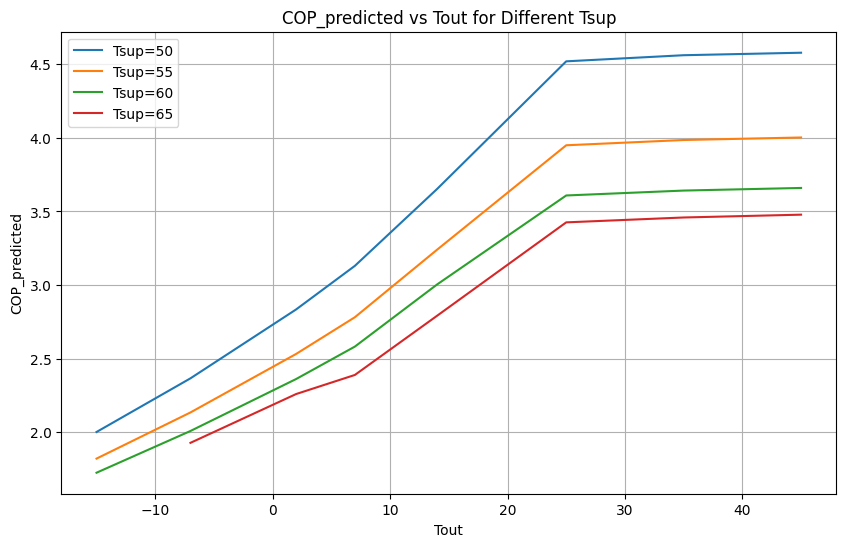

In [ ]:
import matplotlib.pyplot as plt

# Filter the data where COP_predicted and Tout are not NaN
filtered_df = data.dropna(subset=['COP_predicted', 'Tout'])

# Group the filtered data by Tsup
grouped = filtered_df.groupby('Tsup')

# Plot COP_predicted vs Tout for each Tsup value
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for tsup, group in grouped:
    plt.plot(group['Tout'], group['COP_predicted'], label=f'Tsup={tsup}')

plt.xlabel('Tout')
plt.ylabel('COP_predicted')
plt.title('COP_predicted vs Tout for Different Tsup')
plt.legend()
plt.grid(True)
plt.show()


#### Tamb and COP

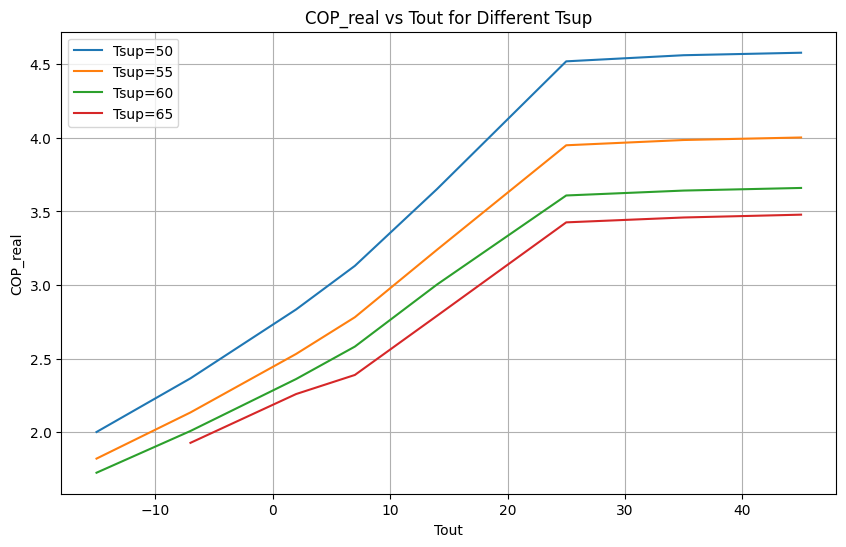

In [ ]:
import matplotlib.pyplot as plt

# Filter the data where COP_predicted and Tout are not NaN
filtered_df = data.dropna(subset=['COP_real', 'Tout'])

# Group the filtered data by Tsup
grouped = filtered_df.groupby('Tsup')

# Plot COP_predicted vs Tout for each Tsup value
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for tsup, group in grouped:
    plt.plot(group['Tout'], group['COP_predicted'], label=f'Tsup={tsup}')

plt.xlabel('Tout')
plt.ylabel('COP_real')
plt.title('COP_real vs Tout for Different Tsup')
plt.legend()
plt.grid(True)
plt.show()

#### Scatter Plot of COP_real vs PLR

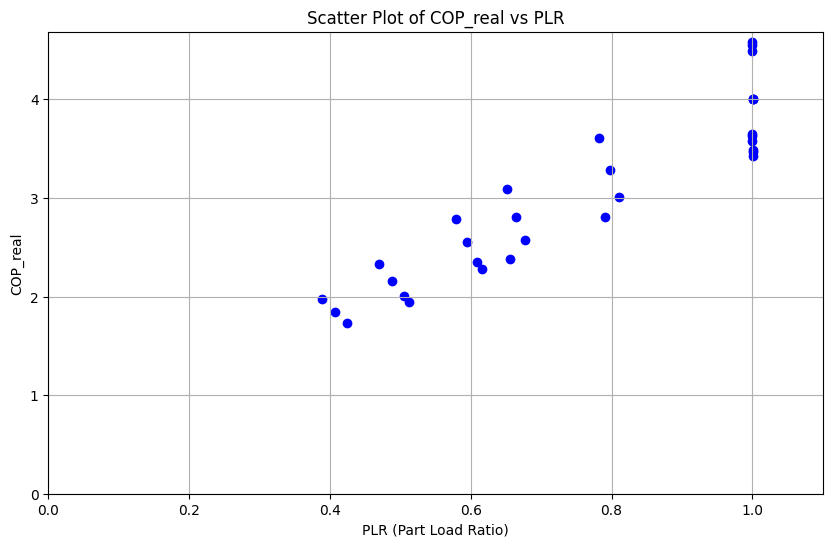

In [ ]:

# Filter the data where COP_real and PLR are not NaN
filtered_df = data.dropna(subset=['PLR', 'COP_real'])

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.scatter(filtered_df['PLR'], filtered_df['COP_real'], color='b', marker='o')
plt.xlabel('PLR (Part Load Ratio)')
plt.ylabel('COP_real')
plt.title('Scatter Plot of COP_real vs PLR')
plt.grid(True)

plt.xlim(0, filtered_df['PLR'].max() + 0.1)
plt.ylim(0, filtered_df['COP_real'].max() + 0.1)

plt.show()

#### Power Comparison for Tsup = {target_Tsup}: P_ele vs P_el_predicted

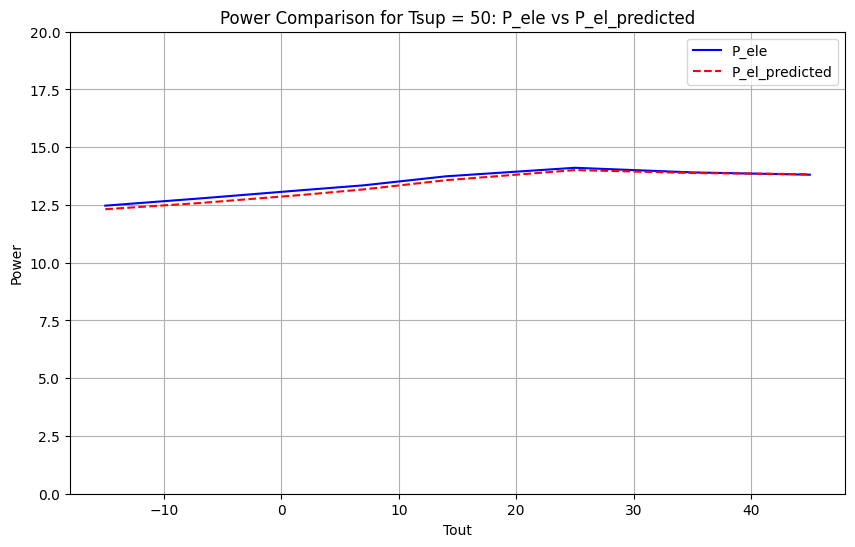

In [ ]:
# Choose the specific Tsup value for which you want to create the plot
target_Tsup = 50  # Replace this with your desired Tsup value

# Filter the data for the chosen Tsup value
filtered_df = train_data[train_data['Tsup'] == target_Tsup].dropna(subset=['P_ele', 'P_el_predicted'])

# Create a plot with both P_ele and P_el_predicted for the specific Tsup
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(filtered_df['Tout'], filtered_df['P_ele'], label='P_ele', color='b')
plt.plot(filtered_df['Tout'], filtered_df['P_el_predicted'], label='P_el_predicted', color='r', linestyle='dashed')

plt.xlabel('Tout')
plt.ylabel('Power')
plt.title(f'Power Comparison for Tsup = {target_Tsup}: P_ele vs P_el_predicted')
plt.legend()
plt.grid(True)

# Set y-axis limits to start from 0
plt.ylim(0, 20)

plt.show()